In [1]:
# Install requirements.txt

# Huggingface login

In [1]:
import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration
from PIL import Image

In [2]:
model_id = "llava-hf/llava-1.5-7b-hf"


In [3]:
processor = AutoProcessor.from_pretrained(model_id)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [4]:
model = LlavaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.float16,    # half precision for memory efficiency
    device_map="auto"             # auto-distribution across available GPUs
    # load_in_4bit=True           # Uncomment if you want extreme memory savings
)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
image_path = "/home/Animals.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")

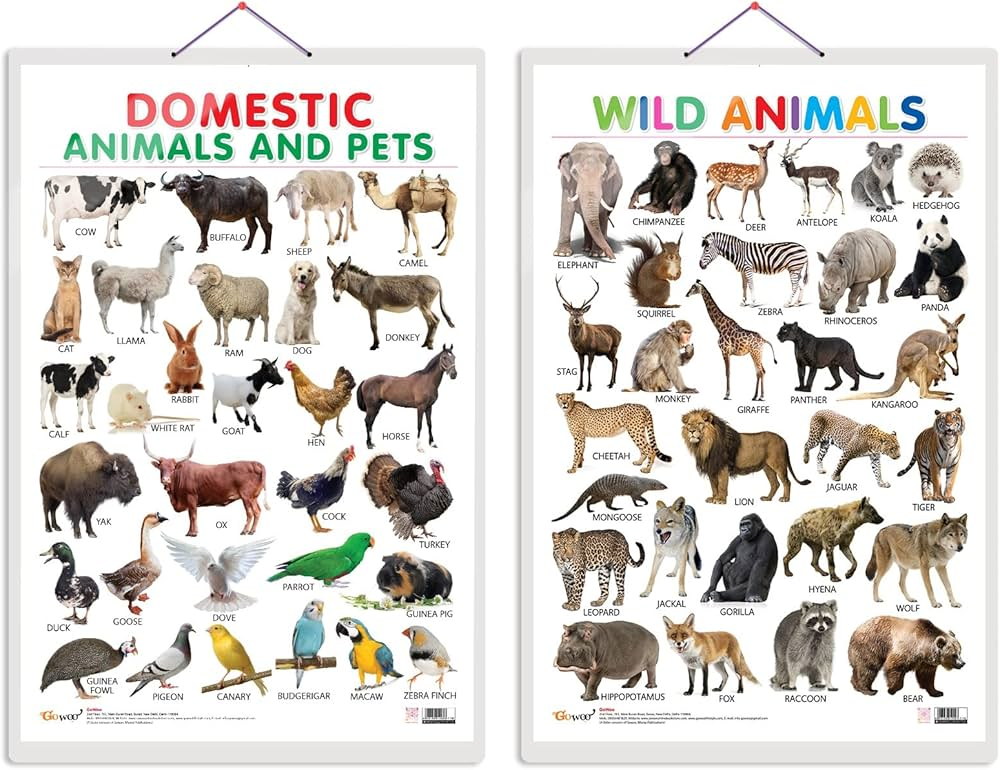

In [6]:
image

In [7]:
#prompt = "<image>\nDescribe this image in detail."
prompt = "<image>\nWhat objects are present in this image?"

In [8]:
inputs = processor(images=image, text=prompt, return_tensors="pt").to(model.device)


In [9]:
with torch.no_grad():
    outputs = model.generate(
        **inputs,
        max_new_tokens=100,       # You can increase for longer output
        temperature=0.7,          # Creativity level
        do_sample=True            # Add sampling randomness
    )

In [10]:
result = processor.decode(outputs[0], skip_special_tokens=True)

In [11]:
print("\nGenerated Output:\n", result)


Generated Output:
 
What objects are present in this image?

The image features a variety of animals arranged in rows.
